<a href="https://colab.research.google.com/github/Lihuel/data-science/blob/main/ProyectoFinal_DS_SALVO_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMEN**
---
---
La idea de este proyecto es aplicar todo lo aprendido durante el curso de data science, para poder analizar, evaluar y concluir sobre un dataset elegido.
---


**OBJETIVO**
---
---
El objetivo de este análisis es identificar las características que más influyen en el precio de las laptops y desarrollar un modelo predictivo para la fijación de precios respecto a ciertas caracteristicas de cada laptop.
---

**CONTEXTO COMERCIAL**
---
---
El mercado de laptops tiene una gran variedad de opciones disponibles para los consumidores. Entender cómo las diferentes especificaciones técnicas afectan el precio puede ayudar al consumidor a poder comprar de de manera mas inteligente. Este análisis se basa en un dataset que incluye datos de 1303 laptops de varias marcas reconocidas, permitiendo un amplia variedad de opciones del mercado actual. En un epoca donde la innovación tecnológica y la relación calidad-precio son clave para la decisión de una compra, este estudio proporciona información valiosa para realizar la misma.
---


**ABSTRACT**
---
---
**1 - Company -** Es un dato tipo String - Es la empresa que fabrico la laptop.
---
**2 - Product -** Es un dato tipo String - Es la linea y modelo de la laptop.
---
**3 - TypeName -** Es un dato tipo String - Type (Notebook, Ultrabook, Gaming, etc.) Es el tipo de laptop.
---
**4 - Inches -** Es un dato Numerico tipo Float64 - El tamaño de la pantalla en pulgadas.
---
**5 - ScreenResolution -** Es un dato tipo String - La resolucion maxima que soporta la pantalla de la laptop.
---
**6 - Cpu -** Es un dato tipo String - Central Processing Unit (CPU) que modelo de microprocesador tiene la laptop.
---
**7 - Ram -** Es un dato tipo String - La cantidad memoria RAM que tiene la laptop.
---
**8 - Memory -** Es un dato tipo String - Hard Disk / SSD Memory. El tipo y la cantidad de almacenamiento que tiene la laptop.
---
**9 - GPU -** Es un dato tipo String - Graphics Processing Units (GPU) Se refiere al modelo de placa de video que tiene la laptop.
---
**10 - OpSys -** Es un dato tipo String - Si la laptop tiene sistema operativo y cual es.
---
**11 - Weight -** Es un dato tipo String -  Es el peso en kilo gramos de la Laptop .
---
**12 - Price_euros -** Es un dato Numerico tipo Float64 - Price (Euro) Es el precio de la laptop en Euros.
---



# Hipotesis planteadas:
---
1. Que compania o empresa tiene las laptops mas caras? check
---
2. Que laptops tiene mayor cantidad de RAM y memoria de almacenamiento(ROM)? check
---
3. Que linea de laptop es mas economica? check
---
4. Que modelo de laptop es el mas pesado? check
---
5. Cual es el sistema operativo mas usado? check
---
6. Que tipo de laptop tienen la pantalla mas grande? check
---
7. Que relacion hay entre el precio, con la Memoria RAM, con la Memoria ROM y con el microprocesador CPU? check








**Análisis Exploratorio de Datos**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
url = 'https://raw.githubusercontent.com/Lihuel/data-science/main/laptop_price-original.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.describe().round(1)

,laptop_ID,Inches,Price_euros
count,1303.0,1303.0,1303.0
mean,660.2,15.0,1123.7
std,381.2,1.4,699.0
min,1.0,10.1,174.0
25%,331.5,14.0,599.0
50%,659.0,15.6,977.0
75%,990.5,15.6,1487.9
max,1320.0,18.4,6099.0


In [ ]:
# Saco la columna laptop_ID porque fue tomada como un dato y no lo es, e la poscion de cada dato.
df.drop('laptop_ID',
  axis='columns', inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
# Checkeamos si hay algun valor nulo
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
# Checkeo duplicados
df.duplicated().sum()

28

In [ ]:
# Elimino valores duplicados
df=df.drop_duplicates()

Text(0, 0.5, 'Precio en Euros')

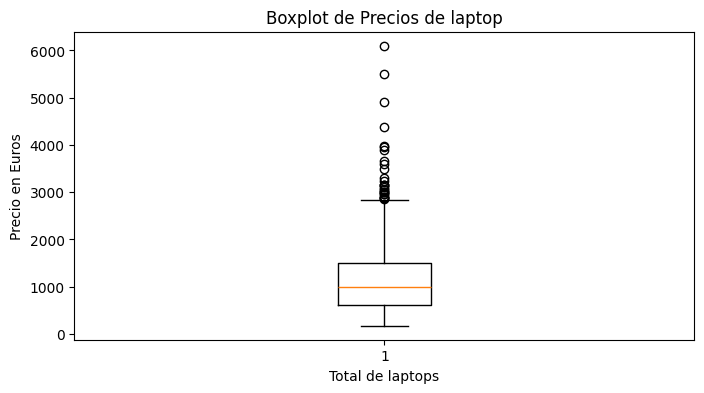

In [ ]:
# Realizo un boxplot de todos los precios para ver si hay outliers
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(df.Price_euros, vert=True)
ax.set_title('Boxplot de Precios de laptop')
ax.set_xlabel('Total de laptops')
ax.set_ylabel('Precio en Euros')


In [ ]:
# Analizando el boxplot busco los 4 valores extremos para chequearlos el resto de sus datos
filtered_df = df[df["Price_euros"] > 4000]
print(filtered_df)
# Analizando las caracteristicas de los valores extremos, se puede tomar la decision que precio es bastante correcto.
# Por lo que se llega a la conclusion que el dataset no tiene ni valores nulos, ni valores mal cargados.

    Company       Product     TypeName  Inches   
196   Razer     Blade Pro       Gaming    17.3  \
610  Lenovo  Thinkpad P51     Notebook    15.6   
749      HP      Zbook 17  Workstation    17.3   
830   Razer     Blade Pro       Gaming    17.3   

                        ScreenResolution                            Cpu   Ram   
196  4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz  32GB  \
610      IPS Panel 4K Ultra HD 3840x2160  Intel Xeon E3-1535M v6 3.1GHz  32GB   
749          IPS Panel Full HD 1920x1080  Intel Xeon E3-1535M v5 2.9GHz  16GB   
830  4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz  32GB   

        Memory                      Gpu       OpSys  Weight  Price_euros  
196    1TB SSD  Nvidia GeForce GTX 1080  Windows 10  3.49kg       6099.0  
610    1TB SSD     Nvidia Quadro M2200M  Windows 10   2.5kg       4899.0  
749  256GB SSD     Nvidia Quadro M2000M   Windows 7     3kg       4389.0  
830  512GB SSD  Nvidia GeForce GTX 1080  Wi

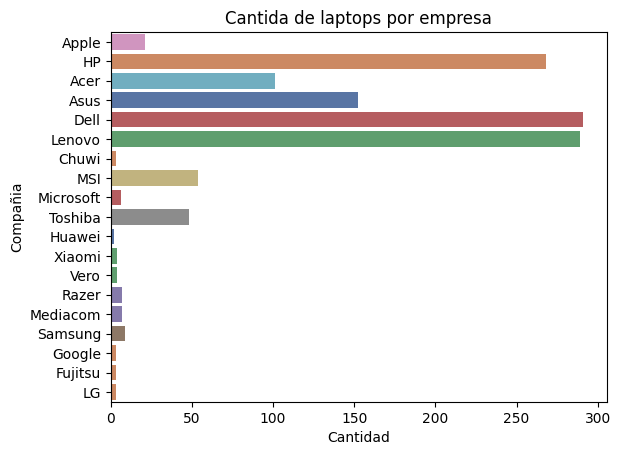

In [ ]:
# cantidad de laptops por empresa
df_cantidad = df.groupby('Company')["Product"].count()
df["cantidad_de_laptops"] = df["Company"].map(df_cantidad)
sns.barplot(data=df, x="cantidad_de_laptops",y="Company", orient="h",palette="deep", hue="cantidad_de_laptops", legend=False )
plt.title('Cantida de laptops por empresa')
plt.xlabel('Cantidad')
plt.ylabel('Compañia')
plt.show()

**RESPONDIENDO HIPOTESIS 1**
**Que compania o empresa tiene las laptops mas caras?**

Company
Acer         2599.00
Apple        2858.00
Asus         3975.00
Chuwi         449.00
Dell         3659.40
Fujitsu       799.00
Google       2199.00
HP           4389.00
Huawei       1499.00
LG           2299.00
Lenovo       4899.00
MSI          2799.00
Mediacom      389.00
Microsoft    2589.00
Razer        6099.00
Samsung      1849.00
Toshiba      2799.00
Vero          260.00
Xiaomi       1399.95
Name: Price_euros, dtype: float64
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


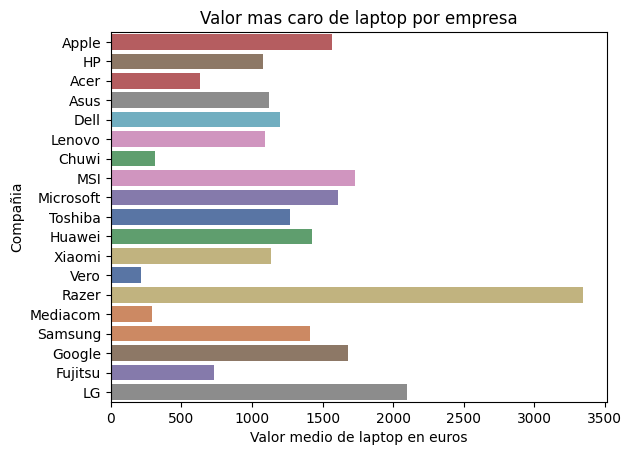

In [ ]:
# valor mas caro de Laptop por empresa
df_by_company_price = df.groupby('Company')
print(df_by_company_price['Price_euros'].max())
# valor medio calculado
print(df.groupby('Company')["Price_euros"].mean())
df_media = df.groupby('Company')["Price_euros"].mean()
df["Valor Medio"] = df["Company"].map(df_media)
# Grafico de barras
sns.barplot(data=df, x="Valor Medio",y="Company", orient="h", palette="deep", hue="Valor Medio", legend=False)
plt.title('Valor mas caro de laptop por empresa')
plt.xlabel('Valor medio de laptop en euros')
plt.ylabel('Compañia')
plt.show()
# Viendo el grafico de barras de valor medio de laptop por empresa, podemos responder la primera hipotesis, donde las laptops de Razer son las mas caras, por el valor medio mas alto.

**RESPONDIENDO HIPOTESIS 2**
**Que laptops tiene mayor cantidad de RAM y memoria de almacenamiento(ROM)?**

Company
Acer         16
Apple        16
Asus         64
Chuwi         6
Dell         32
Fujitsu       8
Google       16
HP           16
Huawei        8
LG           16
Lenovo       32
MSI          32
Mediacom      4
Microsoft    16
Razer        32
Samsung      16
Toshiba      32
Vero          4
Xiaomi       16
Name: RAM_entero, dtype: int64
Company  Memory            
Acer     1TB HDD               32
         256GB SSD             27
         500GB HDD             13
         32GB Flash Storage    10
         128GB SSD              7
                               ..
Toshiba  500GB HDD              9
         128GB SSD              9
         512GB SSD              8
Vero     32GB Flash Storage     4
Xiaomi   256GB SSD              4
Name: count, Length: 129, dtype: int64


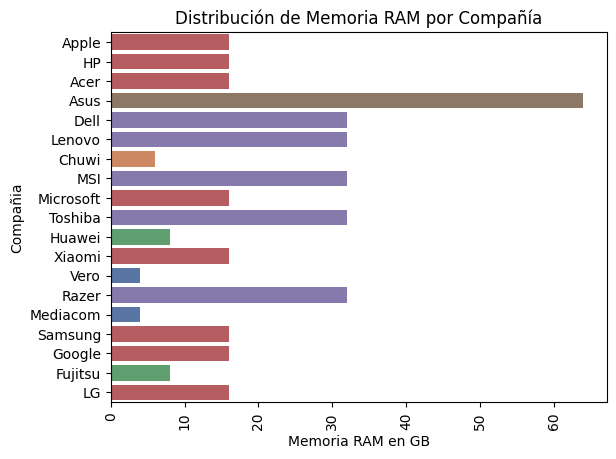

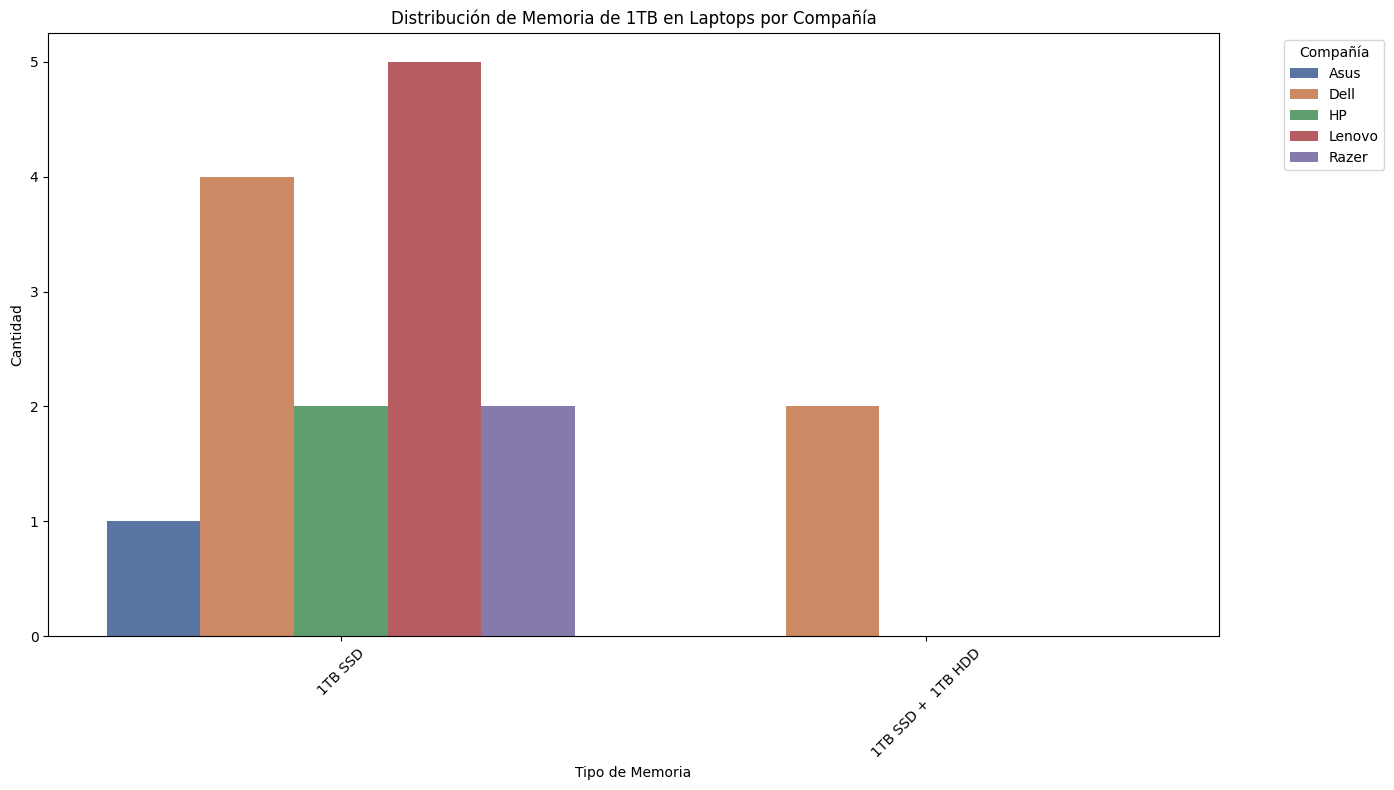

In [ ]:
# Laptop con mayor RAM y mayor ROM
# Para la RAM es facil ya que debemos eliminar del dato el GB y tranformar el resultando en un entero.
df['RAM_entero'] = df['Ram'].str.replace('GB','').astype(np.int64)
df_Mayor_RAM = df.groupby('Company')["RAM_entero"].max()
print(df_Mayor_RAM)
df["Mayor_RAM"] = df["Company"].map(df_Mayor_RAM)
print(df.groupby('Company')["Memory"].value_counts())
# Filtramos todas las computadoras que tengan 1TB SSD, siendo el valor mas alto y mas moderno en almacenamiento ROM.
Memoria_ROM = df[df['Memory'].str.contains('1TB SSD')]
Memoria_ROM_compania = Memoria_ROM[['Company', 'Memory']].reset_index(drop=True)
cantidad_por_compania = Memoria_ROM_compania.groupby(['Company', 'Memory']).size().reset_index(name='Count')
# print(Memoria_ROM_compania)

sns.barplot(x="Mayor_RAM" ,y="Company",data=df, palette="deep", hue= "Mayor_RAM", legend=False)
plt.title('Distribución de Memoria RAM por Compañía')
plt.xlabel('Memoria RAM en GB')
plt.ylabel('Compañia')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=cantidad_por_compania, x='Memory', y='Count', hue='Company',palette="deep")
plt.title('Distribución de Memoria de 1TB en Laptops por Compañía')
plt.xlabel('Tipo de Memoria')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Compañía', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Analizando el primer grafico, donde vemos la mayor Ram por compañia, podemos decir que las laptops de Asus tienen la mayor RAM.
# Analizando el segundo grafico, donde vemos la memoria ROM por compañia, podemos decir que las laptops de del son la que tienen mayor cantidad de ROM.

**RESPONDIENDO HIPOTESIS 3**
**Que linea de laptop es mas economica?**

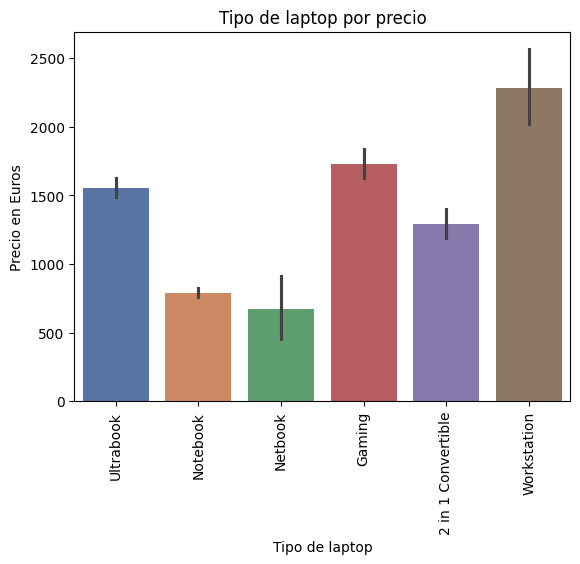

In [ ]:
# El siguiente grafico muestra el tipo de laptop por precio. Donde respondemos la hipotesis de que linea es mas economico. La linea de laptops para netbook.
sns.barplot(x="TypeName",y="Price_euros",data=df, palette="deep", hue= "TypeName", legend=False)
plt.xticks(rotation="vertical")
plt.title('Tipo de laptop por precio')
plt.xlabel('Tipo de laptop')
plt.ylabel('Precio en Euros')
plt.show()

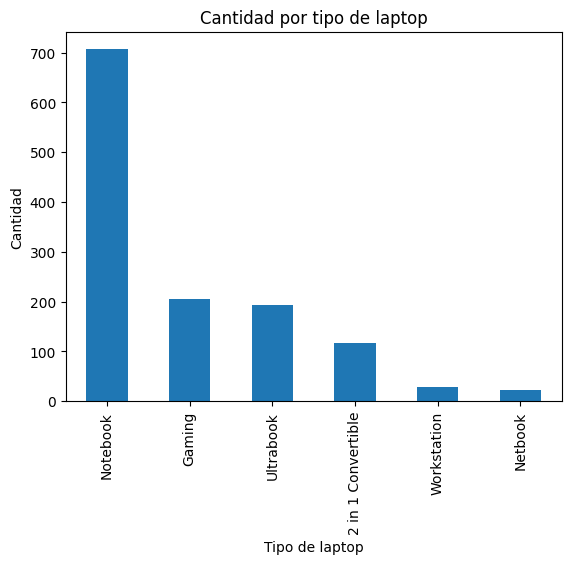

In [ ]:
# Como esta distribuido el tipo de laptop de la muestra por tipo.
df["TypeName"].value_counts().plot(kind="bar")
plt.title('Cantidad por tipo de laptop')
plt.xlabel('Tipo de laptop')
plt.ylabel('Cantidad')
plt.show()

**RESPONDIENDO HIPOTESIS 4**
**Que modelo de laptop es el mas pesado?**

Company
Acer         4.200
Apple        2.040
Asus         4.700
Chuwi        1.890
Dell         4.420
Fujitsu      2.300
Google       1.100
HP           3.780
Huawei       1.050
LG           1.090
Lenovo       4.600
MSI          4.500
Mediacom     1.450
Microsoft    1.252
Razer        3.490
Samsung      2.500
Toshiba      2.400
Vero         1.450
Xiaomi       1.950
Name: laptop mas pesada, dtype: float64


Text(0.5, 0, 'Peso en KG')

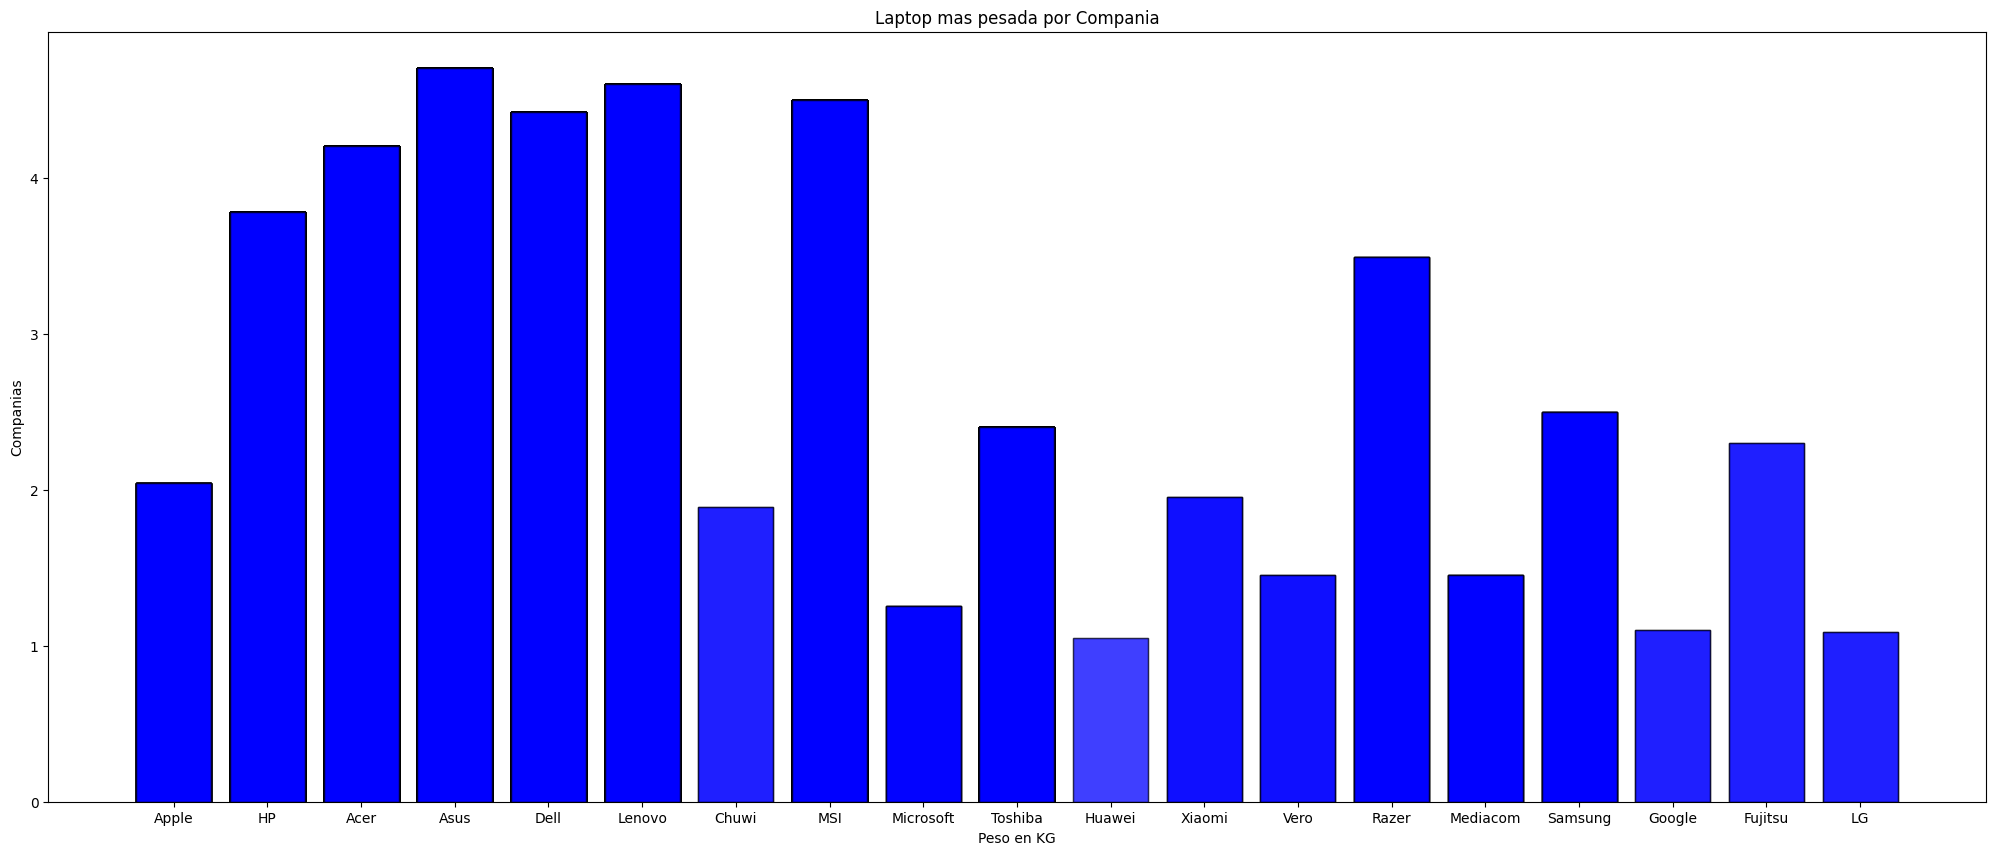

In [ ]:
# Laptop mas pesada en kg por empresa
df['laptop mas pesada'] = df['Weight'].str.replace('kg','').astype(np.float64)
df_pesada = df.groupby('Company')["laptop mas pesada"].max()
print(df_pesada)
df["laptop mas pesada"] = df["Company"].map(df_pesada)
# Grafico de barras de los diferentes pesos por empresa
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(x=df.Company , height=df["laptop mas pesada"] , color= "blue" , alpha=0.5, edgecolor='black')
ax.set_title('Laptop mas pesada por Compania')
ax.set_ylabel('Companias')
ax.set_xlabel('Peso en KG')
# Analizando el grafico podemos ver la laptop mas pesada la tiene la empresa lenovo con un peso de 4.6kg


**RESPONDIENDO HIPOTESIS 5**
**Cual es el sistema operativo mas usado?**

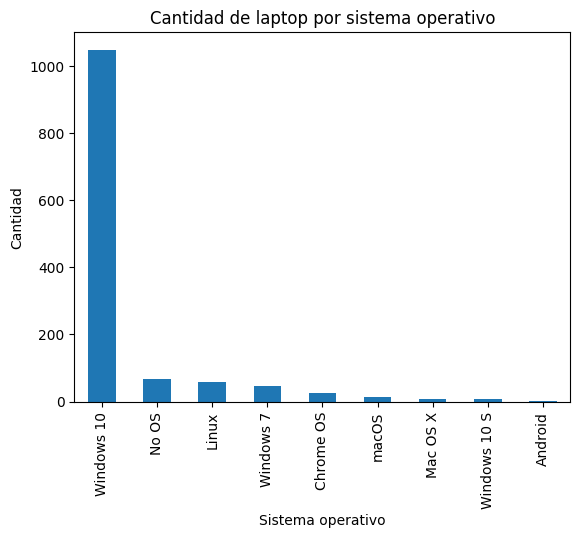

In [ ]:
# Histograma para ver cual sistema operativo es mas usado. La respuesta es Window 10
df["OpSys"].value_counts().plot(kind='bar')
plt.title('Cantidad de laptop por sistema operativo')
plt.xlabel('Sistema operativo')
plt.ylabel('Cantidad')
plt.show()

**RESPONDIENDO HIPOTESIS 6**
**Que tipo de laptop tienen la pantalla mas grande?**

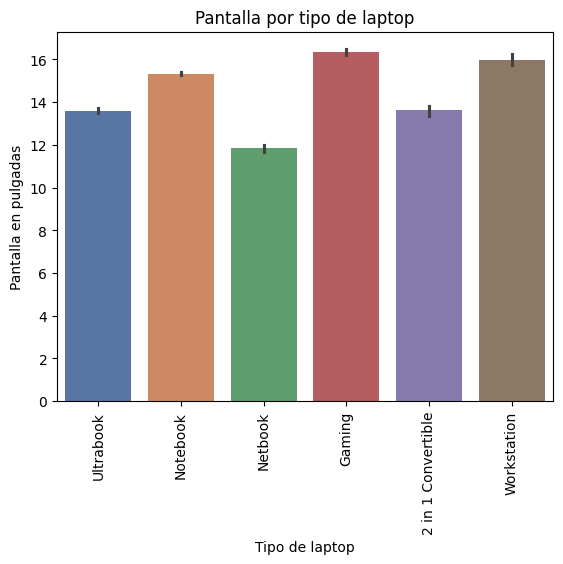

In [ ]:
# En el siguiente grafico de barras podemos ver que tipo de notebook tiene la pantalla mas grande.
# Podemos responder la hipotesis de la pantalla mas grande. La lineas de laptops de Gaming y workstation tienen los dos valores mas latos de pantallas.
sns.barplot(x="TypeName",y="Inches", data = df, palette='deep', hue='TypeName', legend=False)
plt.xticks(rotation="vertical")
plt.title('Pantalla por tipo de laptop')
plt.xlabel('Tipo de laptop')
plt.ylabel('Pantalla en pulgadas')
plt.show()

**RESPONDIENDO HIPOTESIS 7**
**Que relacion hay entre el precio, con la Memoria RAM, con la Memoria ROM y con el microprocesador CPU?**

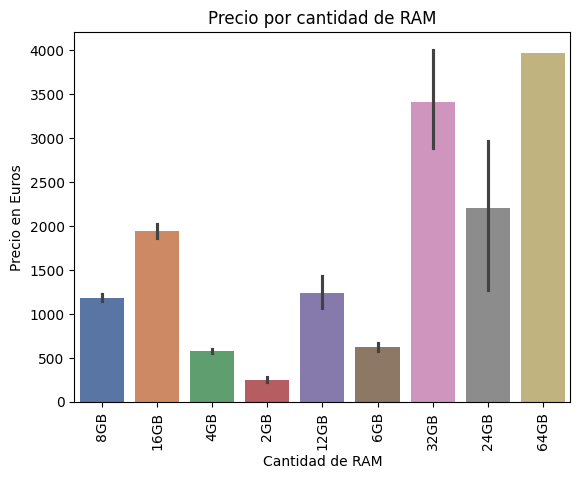

In [ ]:
# En el siguiente grafico de barras podemos como varia el precio segun la cantidad de RAM.
sns.barplot(x='Ram', y='Price_euros',data=df, palette='deep', hue='Ram', legend=False)
plt.title('Precio por cantidad de RAM')
plt.xlabel('Cantidad de RAM')
plt.ylabel('Precio en Euros')
plt.xticks(rotation='vertical')
plt.show()

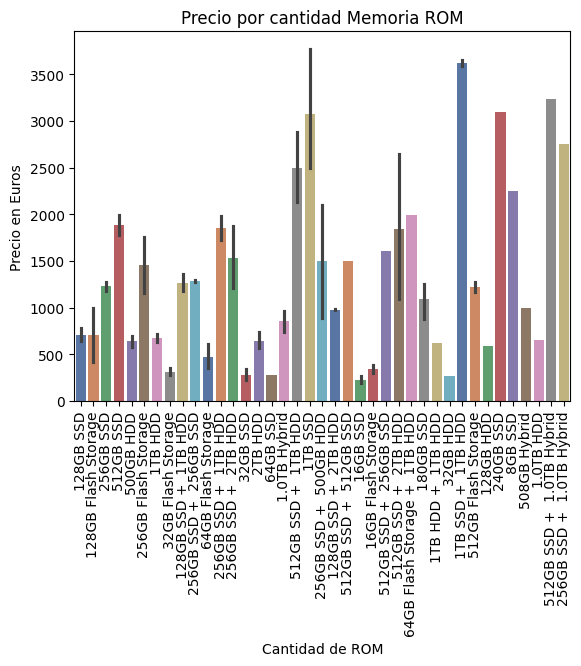

In [ ]:
# En el siguiente grafico de barras podemos como varia el precio segun la cantidad de Memoria ROM.
sns.barplot(x='Memory', y='Price_euros',data=df, palette='deep', hue='Memory', legend=False)
plt.title('Precio por cantidad Memoria ROM')
plt.xlabel('Cantidad de ROM')
plt.ylabel('Precio en Euros')
plt.xticks(rotation='vertical')
plt.show()

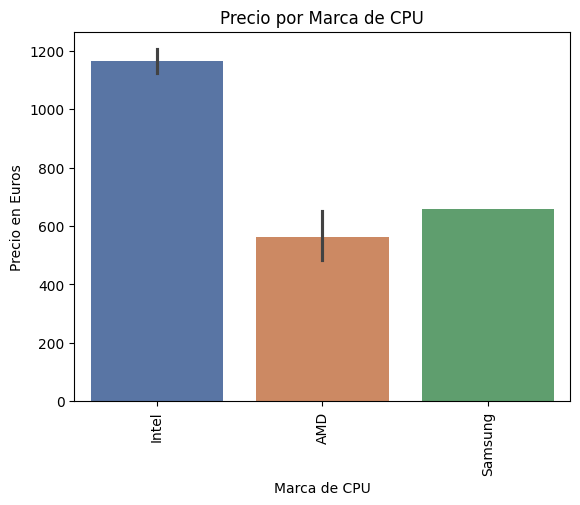

In [ ]:

df['Marca_Cpu'] = df['Cpu'].str[:5]
df["Marca_Cpu"].values
df['Marca_Cpu'] = df['Marca_Cpu'].str.replace('AMD A', 'AMD')
df['Marca_Cpu'] = df['Marca_Cpu'].str.replace('AMD E', 'AMD')
df['Marca_Cpu'] = df['Marca_Cpu'].str.replace('AMD R', 'AMD')
df['Marca_Cpu'] = df['Marca_Cpu'].str.replace('AMD F', 'AMD')
df['Marca_Cpu'] = df['Marca_Cpu'].str.replace('Samsu', 'Samsung')
# En el siguiente grafico de barras podemos como varia el precio segun La marca de CPU.
sns.barplot(x='Marca_Cpu', y='Price_euros',data=df, palette='deep', hue='Marca_Cpu', legend=False)
plt.title('Precio por Marca de CPU')
plt.xlabel('Marca de CPU')
plt.ylabel('Precio en Euros')
plt.xticks(rotation='vertical')
plt.show()

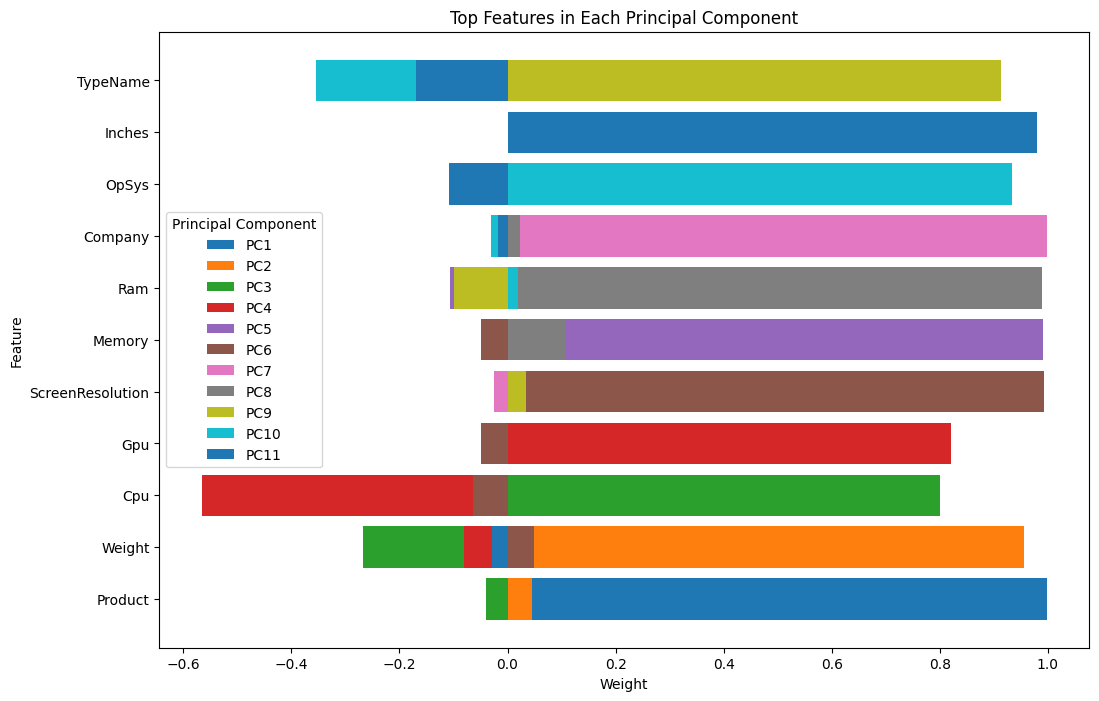

Error cuadrático medio en conjunto de entrenamiento: 18533.77
Error cuadrático medio en conjunto de prueba: 124743.69


In [ ]:

# Elegi el modelo Random Forest para predecir el precio de las laptops, ya que es el que mejor resultados obtuvo, es un modelo de aprendizaje supervisado.
# Dividimos los datos en características (X) y variable objetivo (y)
X = df.drop(columns=['Price_euros'])  # Conservamos todas las columnas excepto "price_euro" en X
y = df['Price_euros'] # Usamos 'Price_euros' como la variable objetivo en y

# Label Encoding para las características categóricas, utilice label enconding porque tenia varias categorias
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Calcular el número máximo de componentes principales
max_components = min(X.shape)

# Reduje la dimensionalidad utilizando PCA con el número máximo de componentes disponibles
pca = PCA(n_components=max_components)
X_pca = pca.fit_transform(X)

# Obtengo el número real de componentes principales seleccionados
n_components = pca.n_components_

# Obtengo los nombres de las características originales
feature_names = X.columns

# Obtengo los pesos de las características originales en cada componente principal
component_names = [f'PC{i+1}' for i in range(n_components)]
component_weights = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)

# Selecciono las características principales con los mayores pesos absolutos en cada componente principal
top_features = {}
for component in component_names:
    abs_weights = np.abs(component_weights.loc[component])
    top_features[component] = abs_weights.nlargest(5).index.tolist()

# Grafico solo las características principales
plt.figure(figsize=(12, 8))
for component, features in top_features.items():
    weights = component_weights.loc[component, features]
    plt.barh(features, weights, label=component)

plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Top Features in Each Principal Component')
plt.legend(title='Principal Component')
plt.show()

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# entrenamos un modelo de RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de entrenamiento y prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculo de los errores para mi modelo de regresion, no pude realizar la matriz de confusion ya que es para modelos de clasificación

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadrático medio en conjunto de entrenamiento (MSE): {mse_train:.2f}")
print(f"Error cuadrático medio en conjunto de prueba (MSE): {mse_test:.2f}")
print(f"Raíz del error cuadrático medio en conjunto de entrenamiento (RMSE): {rmse_train:.2f}")
print(f"Raíz del error cuadrático medio en conjunto de prueba (RMSE): {rmse_test:.2f}")
print(f"Error absoluto medio en conjunto de entrenamiento (MAE): {mae_train:.2f}")
print(f"Error absoluto medio en conjunto de prueba (MAE): {mae_test:.2f}")
print(f"Coeficiente de determinación en conjunto de entrenamiento (R²): {r2_train:.2f}")
print(f"Coeficiente de determinación en conjunto de prueba (R²): {r2_test:.2f}")




# Se dio que en la primera prueba que hice con la dimensionalidad en 12 me da que el modelo queda sobreajustado (overfitting)

Error cuadrático medio en conjunto de entrenamiento (MSE): 21290.26
Error cuadrático medio en conjunto de prueba (MSE): 133475.36
Raíz del error cuadrático medio en conjunto de entrenamiento (RMSE): 145.91
Raíz del error cuadrático medio en conjunto de prueba (RMSE): 365.34
Error absoluto medio en conjunto de entrenamiento (MAE): 86.99
Error absoluto medio en conjunto de prueba (MAE): 197.60
Coeficiente de determinación en conjunto de entrenamiento (R²): 0.96
Coeficiente de determinación en conjunto de prueba (R²): 0.74


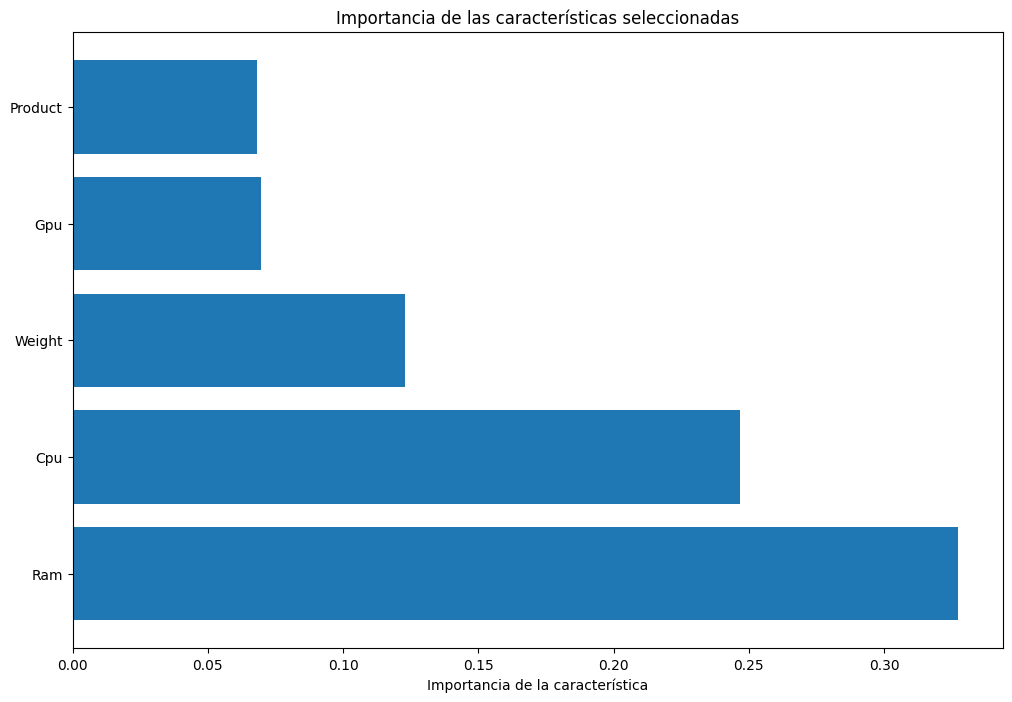

In [ ]:
X = df.drop(columns=['Price_euros']) # Conservamos todas las columnas excepto "price_euro" en X
y = df['Price_euros'] # Usamos 'Price_euros' como la variable objetivo en y

# Label Encoding para las características categóricas, utilice label enconding porque tenia varias categorias
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de RandomForestRegressor para evaluar la importancia de las características
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtengo la importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Selecciono las características más importantes
num_features = 5 # El número de características más importantes que deseo mantener
important_indices = indices[:num_features]
X_train_reduced = X_train.iloc[:, important_indices]
X_test_reduced = X_test.iloc[:, important_indices]

# Aplico PCA para reducir la dimensionalidad adicionalmente
pca = PCA(n_components=min(X_train_reduced.shape[1], num_features))
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)

# Entreno el modelo con las características seleccionadas y reducidas
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_pca, y_train)

# Realizo predicciones en el conjunto de entrenamiento y prueba
y_train_pred = rf_model_reduced.predict(X_train_pca)
y_test_pred = rf_model_reduced.predict(X_test_pca)

# Calculo métricas de evaluación en el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadrático medio en conjunto de entrenamiento (MSE): {mse_train:.2f}")
print(f"Error cuadrático medio en conjunto de prueba (MSE): {mse_test:.2f}")
print(f"Raíz del error cuadrático medio en conjunto de entrenamiento (RMSE): {rmse_train:.2f}")
print(f"Raíz del error cuadrático medio en conjunto de prueba (RMSE): {rmse_test:.2f}")
print(f"Error absoluto medio en conjunto de entrenamiento (MAE): {mae_train:.2f}")
print(f"Error absoluto medio en conjunto de prueba (MAE): {mae_test:.2f}")
print(f"Coeficiente de determinación en conjunto de entrenamiento (R²): {r2_train:.2f}")
print(f"Coeficiente de determinación en conjunto de prueba (R²): {r2_test:.2f}")

# Grafico la importancia de las características seleccionadas
plt.figure(figsize=(12, 8))
plt.barh(range(num_features), importances[indices[:num_features]], align='center')
plt.yticks(range(num_features), [X.columns[i] for i in indices[:num_features]])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características seleccionadas')
plt.show()

**Analisis de las metricas**
---
---
**Error Cuadrático Medio (MSE)**
---
Entrenamiento: 21290.26
Prueba: 133475.36
---
El MSE es significativamente más bajo en el conjunto de entrenamiento que en el conjunto de prueba, lo que sugiere que el modelo se ajusta bien a los datos de entrenamiento, pero no tan bien a los datos del conjunto de prueba. Esto puede ser una indicación de sobreajuste (overfitting).
---
**Raíz del Error Cuadrático Medio (RMSE)**
---
Entrenamiento: 145.91
Prueba: 365.34
---
Similar al MSE, el RMSE es mucho mayor en el conjunto de prueba que en el de entrenamiento, lo que refuerza la idea de que el modelo podría estar sobreajustado a los datos de entrenamiento.
---
**Error Absoluto Medio (MAE)**
---
Entrenamiento: 86.99
Prueba: 197.60
---
El MAE también es considerablemente mayor en el conjunto de prueba que en el de entrenamiento, lo que nuevamente indica una diferencia en el rendimiento del modelo entre los datos de entrenamiento y prueba.
---
**Coeficiente de Determinación (R²)**
---
Entrenamiento: 0.96
Prueba: 0.74
----
Un R² de 0.96 en el conjunto de entrenamiento sugiere que el modelo explica el 96% de la variabilidad de los datos de entrenamiento, lo cual es excelente.
Un R² de 0.74 en el conjunto de prueba indica que el modelo explica el 74% de la variabilidad de los datos de prueba, lo cual sigue siendo bastante bueno, pero no tan alto como en el conjunto de entrenamiento. La disminución del R² en el conjunto de prueba es otra señal de que el modelo podría estar sobreajustado.
---



**CONCLUSION**
---
---
Del modelo exploratorio de datos, puedo concluir que las laptop mas caras son de la marca Razer y de tipo Gamer, algo entendible por las prestaciones de las mismas.
---
El tipo de laptop mas barato son las netbook, tambien algo logico ya que tienen poca memoria ram, rom, y un microprocesador de bajo costo.
---
Tambien viendo la relacion precio por memoria ram podemos ver que para valores mayores a 24GB, aumenta considerable el precio.
---
Analizando la relacion precio por memoria rom, llego a la conclusion, que el precio aumenta si se tiene disco ssd y a medida que aumenta su capacidad.
---
Por ultimo viendo la relacion de precio por marca de microprocesador, que las laptops con marca intel son las mas caras.
---
Las métricas de rendimiento indican que el modelo se ajusta muy bien a los datos de entrenamiento pero no tan bien a los datos de prueba. Esto indica problemas de sobreajuste, donde el modelo ha aprendido demasiado los detalles con el conjunto de datos de entrenamiento y la variacion de los datos en el conjunto de prueba hacen que su capacidad para predecir nuevos valores no sea totalmente precisa.
---
El sobreajuste se puede corregir mediante diferentes tecnicas, pero si no tengo entendido mal se veran en la siguente parte del curso.
---